<a href="https://colab.research.google.com/github/Ketan-Suke/1st-Demo/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

imagePaths = []
labels = []
for root,dirnames,filenames in os.walk('/content/drive/MyDrive/INTERNSHIP-prodgy/archive (1)/'):
  for filename in filenames:
    if filename.lower().endswith(('png','jpeg','jpg')):
       imagePaths.append(os.path.join(root, filename))

       labels.append(root[74:])

print(len(labels))
print(len(imagePaths))

0
0


Mean Absolute Error: 35788.061292436294
Mean Squared Error: 2806426667.247853
Root Mean Squared Error: 52975.71771338122
R² Score: 0.6341189942328371


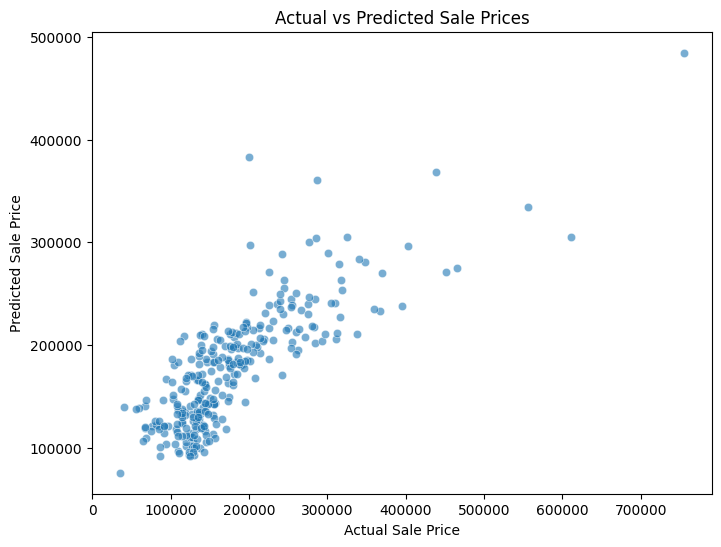

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the training dataset
train_path = "/content/drive/MyDrive/INTERNSHIP-prodgy/archive (1)/train.csv"
test_path = "/content/drive/MyDrive/INTERNSHIP-prodgy/archive (1)/test.csv"

df = pd.read_csv(train_path)

# Select relevant features and target variable
features = ["GrLivArea", "BedroomAbvGr", "FullBath"]
target = "SalePrice"

# Drop rows with missing values in selected features
df = df[features + [target]].dropna()

# Split data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Load the test dataset for final predictions
test_df = pd.read_csv(test_path)

# Ensure the required columns exist and handle missing values
test_df = test_df[features].dropna()

# Predict prices for the test dataset
test_predictions = model.predict(test_df)

# Create a submission file
submission = pd.DataFrame({"Id": test_df.index, "SalePrice": test_predictions})
submission.to_csv("house_price_predictions.csv", index=False)

# Visualizing predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.show()
